In [3]:

import pandas as pd

file_path = r"C:\Users\ricky\Downloads\yelpdavisrestaurants2 - Sheet1.csv"
df = pd.read_csv(file_path)

df.head()
df["Type of Cuisine"].head(10).to_list()


['New American, Sandwiches, Salad',
 'Dim Sum, Noodles, Asian Fusion',
 'Mediterranean, Halal',
 'Vietnamese, Noodles, Soup',
 'Burgers, Sandwiches, Chicken Shop',
 'Poke, Seafood, Hawaiian',
 'Dim Sum, Desserts, Noodles',
 'Asian Fusion, Hong Kong Style Cafe, Steakhouses',
 'Dim Sum, Seafood',
 'Bakeries, Breakfast & Brunch, Patisserie/Cake Shop']

In [4]:
df["Cuisine_List"] = df["Type of Cuisine"].str.split(r",\s*")
print(df["Cuisine_List"].head(10).to_list())

[['New American', 'Sandwiches', 'Salad'], ['Dim Sum', 'Noodles', 'Asian Fusion'], ['Mediterranean', 'Halal'], ['Vietnamese', 'Noodles', 'Soup'], ['Burgers', 'Sandwiches', 'Chicken Shop'], ['Poke', 'Seafood', 'Hawaiian'], ['Dim Sum', 'Desserts', 'Noodles'], ['Asian Fusion', 'Hong Kong Style Cafe', 'Steakhouses'], ['Dim Sum', 'Seafood'], ['Bakeries', 'Breakfast & Brunch', 'Patisserie/Cake Shop']]


In [5]:
df["Cuisine_List"] = df["Type of Cuisine"].str.split(r",\s*")

In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

cuisine_dummies = pd.DataFrame(
    mlb.fit_transform(df["Cuisine_List"]),
    columns=mlb.classes_,
    index=df.index
)

df = pd.concat([df, cuisine_dummies], axis=1)
sorted(mlb.classes_)

['Acai Bowls',
 'American',
 'Asian Fusion',
 'Bagels',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Beer',
 'Beer Bar',
 'Breakfast & Brunch',
 'Breweries',
 'Brewpubs',
 'Bubble Tea',
 'Buffets',
 'Burgers',
 'Burmese',
 'Cafes',
 'Cafeteria',
 'Cajun/Creole',
 'Candy Stores',
 'Cantonese',
 'Cards & Stationery',
 'Caterers',
 'Chicken Shop',
 'Chicken Wings',
 'Chinese',
 'Chocolatiers & Shops',
 'Cocktail Bars',
 'Coffee & Tea',
 'Coffee Roasteries',
 'Cooking Classes',
 'Creperies',
 'Cupcakes',
 'Delis',
 'Desserts',
 'Dim Sum',
 'Diners',
 'Donuts',
 'Dumplings',
 'Ethiopian',
 'Falafel',
 'Fast Food',
 'Food Court',
 'Food Delivery Services',
 'Food Stands',
 'Food Trucks',
 'Gluten-Free',
 'Greek',
 'Halal',
 'Hawaiian',
 'Himalayan/Nepalese',
 'Hong Kong Style Cafe',
 'Hot Dogs',
 'Hot Pot',
 'Ice Cream & Frozen Yogurt',
 'Indian',
 'Italian',
 'Japanese',
 'Japanese Curry',
 'Juice Bars & Smoothies',
 'Kebab',
 'Korean',
 'Latin American',
 'Lounges',
 'Massage',
 'Mediterranean',
 

In [19]:
df.loc[:100, ["Type of Cuisine"] + list(mlb.classes_)]


,Type of Cuisine,Acai Bowls,American,Asian Fusion,Bagels,Bakeries,Barbeque,Bars,Beer,Beer Bar,...,Taiwanese,Tea Rooms,Tex-Mex,Thai,Vegan,Vegetarian,Vietnamese,Wine & Spirits,Wine Bars,Wine Tasting Room
0,"New American, Sandwiches, Salad",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Dim Sum, Noodles, Asian Fusion",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Mediterranean, Halal",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Vietnamese, Noodles, Soup",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,"Burgers, Sandwiches, Chicken Shop",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,"Bubble Tea, Juice Bars & Smoothies, Ramen",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,"Cafes, Bubble Tea",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,"Fast Food, Burgers, Tacos",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,Cantonese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
m = 30  # minimum reviews
C = df["Rating"].mean()

df["WeightedScore"] = (
    (df["Reviews"] / (df["Reviews"] + m)) * df["Rating"]
    + (m / (df["Reviews"] + m)) * C
)
df[["Restaurant Name", "Rating", "Reviews", "WeightedScore"]].head(10)

,Restaurant Name,Rating,Reviews,WeightedScore
0,Urban Plates,4.7,96,4.512635
1,88 BaoBao,3.9,16,3.908521
2,Sam's Cuisine,4.4,1400,4.389785
3,Sit Lo Saigon,4.2,231,4.167019
4,The Melt,4.6,51,4.345580
5,Good Friends Hawaiian Poke,4.6,604,4.567495
6,Yang Kee Dumpling,4.6,675,4.570769
7,Tim's Kitchen,4.3,124,4.224623
8,Mom's Dumpling,4.5,13,4.090511
9,Estelle Bakery & Patisserie,3.9,83,3.903469


In [9]:
df.sort_values("WeightedScore", ascending=False)[
    ["Restaurant Name", "Rating", "Reviews", "WeightedScore"]
].head(15)

,Restaurant Name,Rating,Reviews,WeightedScore
29,Hikari Sushi & Omakase,4.9,222,4.782508
38,Tasty Gourmet,4.7,372,4.641274
6,Yang Kee Dumpling,4.6,675,4.570769
5,Good Friends Hawaiian Poke,4.6,604,4.567495
108,Pink Dozen,4.7,143,4.563537
11,Guads Tacos & Beer,4.6,421,4.554306
0,Urban Plates,4.7,96,4.512635
146,Teaspoon,4.6,176,4.499961
138,The Candy House of Davis,4.7,86,4.496482
10,My Burma,4.5,681,4.475235


In [10]:
df["WeightedScore"].mean()

3.8765088639155345

In [11]:
df[["Rating", "WeightedScore"]].describe()

,Rating,WeightedScore
count,199.000000,199.000000
mean,3.913065,3.876509
std,0.675196,0.427442
min,1.000000,1.993770
25%,3.600000,3.706259
50%,4.000000,3.925485
75%,4.300000,4.151163
max,5.000000,4.782508


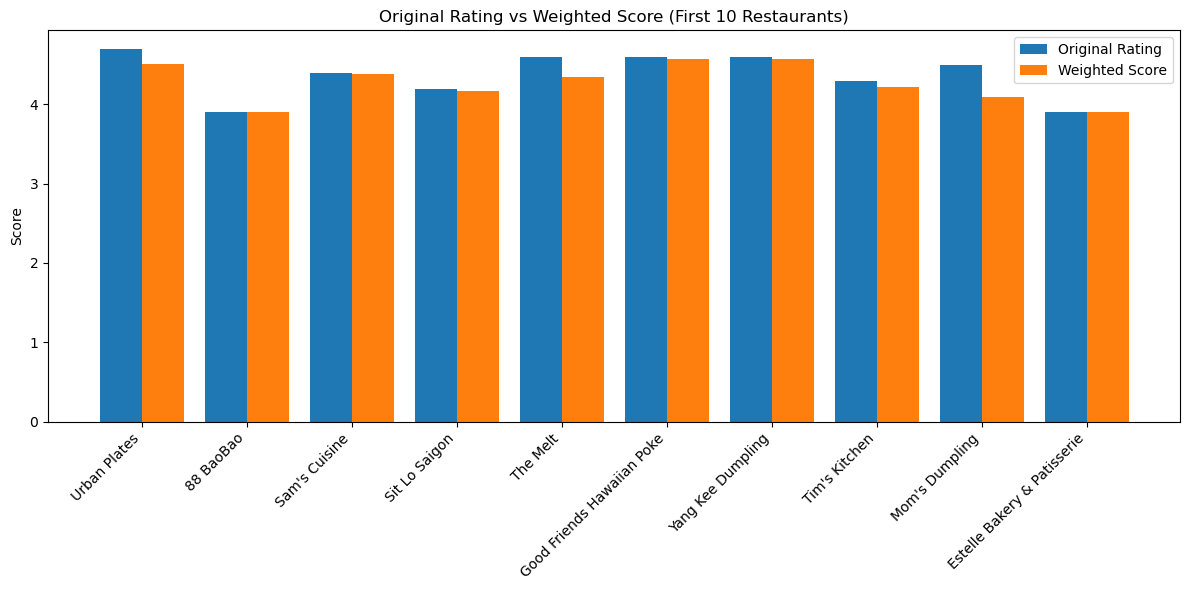

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Ploting first 10 rows > restaurants
sample_df = df.head(10).copy()

# 2) X positions
x = np.arange(len(sample_df))   
width = 0.4                    

# 3) Create side-by-side bars
plt.figure(figsize=(12, 6))

plt.bar(x - width/2, sample_df["Rating"],       width=width, label="Original Rating")
plt.bar(x + width/2, sample_df["WeightedScore"], width=width, label="Weighted Score")

# 4) X-axis labels = restaurant names
plt.xticks(x, sample_df["Restaurant Name"], rotation=45, ha="right")

plt.ylabel("Score")
plt.title("Original Rating vs Weighted Score (First 10 Restaurants)")
plt.legend()
plt.tight_layout()
plt.show()


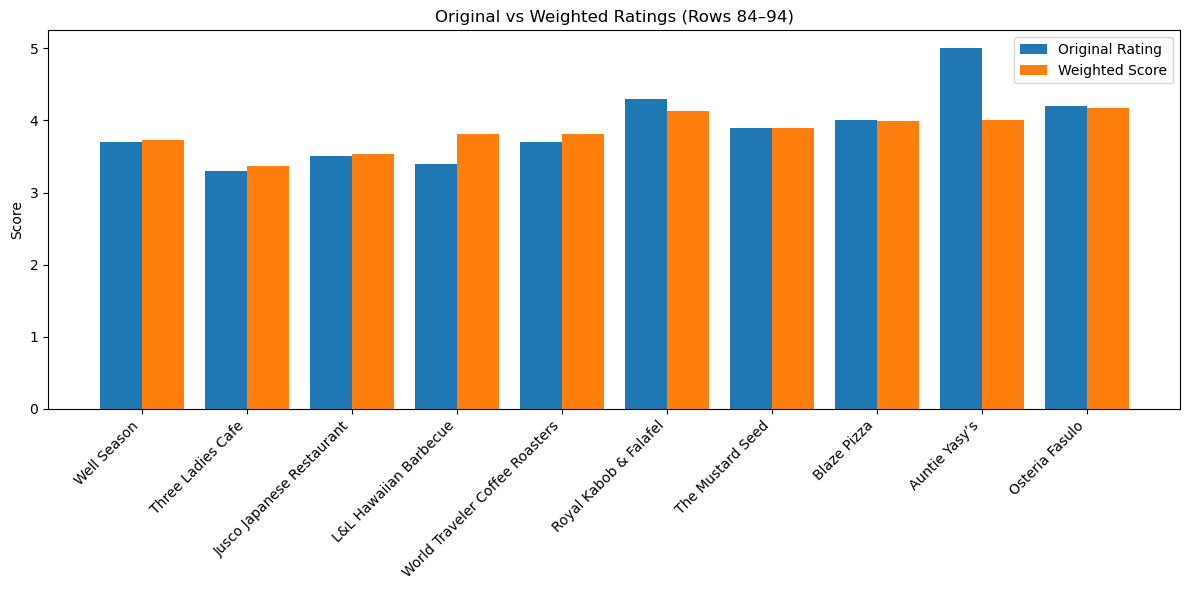

In [13]:
start = 84
end = 94

sample_df = df.iloc[start:end].copy()

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(sample_df))
width = 0.4

plt.figure(figsize=(12, 6))

plt.bar(x - width/2, sample_df["Rating"],        width=width, label="Original Rating")
plt.bar(x + width/2, sample_df["WeightedScore"], width=width, label="Weighted Score")

plt.xticks(x, sample_df["Restaurant Name"], rotation=45, ha="right")
plt.ylabel("Score")
plt.title(f"Original vs Weighted Ratings (Rows {start}–{end})")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
import numpy as np

df["Price Level"] = df["Price Level"].astype(str).str.strip()
df["Price Level"] = df["Price Level"].str.replace(u"\xa0", "", regex=False)
df["Price Level"].head(10).to_list()

['nan', 'nan', '$$', '$$', 'nan', '$$', '$$', '$$', 'nan', '$$']

In [15]:
def price_to_num(x):
    if x == "$":
        return 1
    elif x == "$$":
        return 2
    elif x == "$$$":
        return 3
    elif x == "$$$$":
        return 4
    else:
        return np.nan

df["PriceNum"] = df["Price Level"].apply(price_to_num)
df["PriceNum"].head(10).to_list()


[nan, nan, 2.0, 2.0, nan, 2.0, 2.0, 2.0, nan, 2.0]

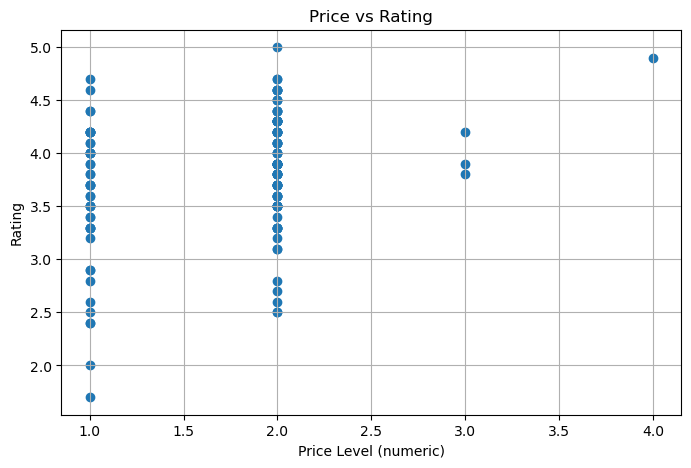

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df["PriceNum"], df["Rating"])
plt.xlabel("Price Level (numeric)")
plt.ylabel("Rating")
plt.title("Price vs Rating")
plt.grid(True)
plt.show()



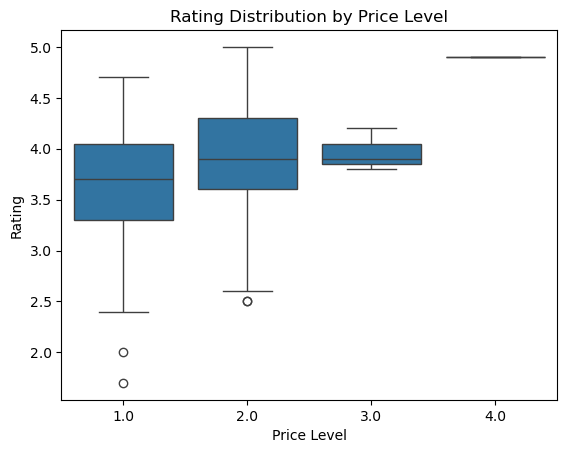

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["PriceNum"], y=df["Rating"])
plt.xlabel("Price Level")
plt.ylabel("Rating")
plt.title("Rating Distribution by Price Level")
plt.show()


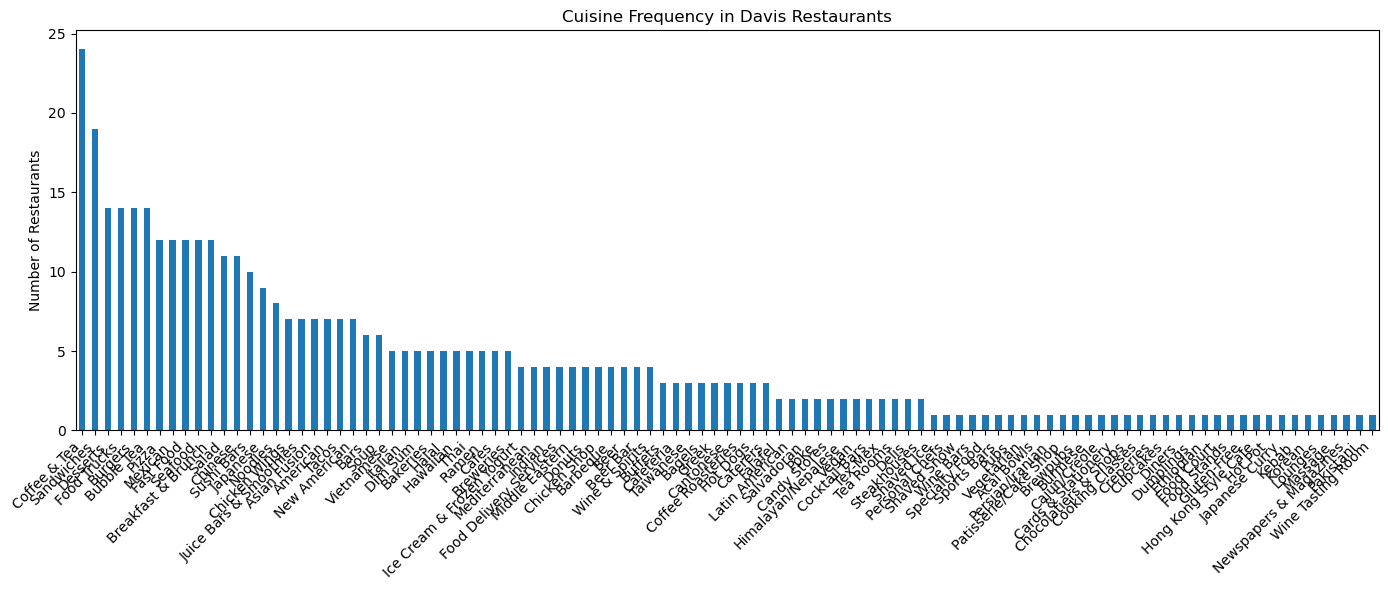

In [22]:
import matplotlib.pyplot as plt

cuisine_cols = list(mlb.classes_)        # all cuisine dummy column names
cuisine_counts = df[cuisine_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
cuisine_counts.plot(kind="bar")
plt.title("Cuisine Frequency in Davis Restaurants")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



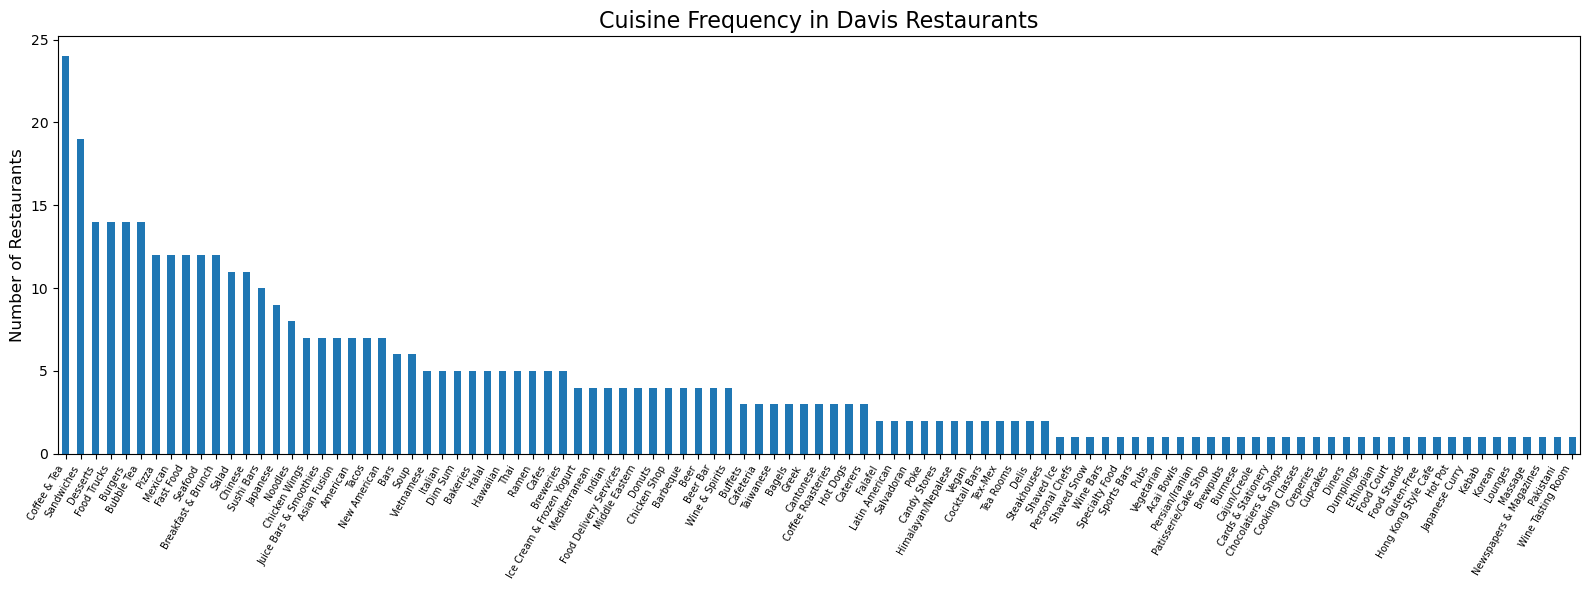

In [23]:
import matplotlib.pyplot as plt

cuisine_cols = list(mlb.classes_)
cuisine_counts = df[cuisine_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(16,6))
cuisine_counts.plot(kind="bar")

plt.title("Cuisine Frequency in Davis Restaurants", fontsize=16)
plt.ylabel("Number of Restaurants", fontsize=12)

# smaller fonts + rotate
plt.xticks(rotation=60, ha='right', fontsize=7)

plt.tight_layout()
plt.show()


In [24]:
avg_rating_by_cuisine = {}

for cuisine in cuisine_cols:
    avg_rating_by_cuisine[cuisine] = df[df[cuisine] == 1]["WeightedScore"].mean()

avg_rating_by_cuisine = pd.Series(avg_rating_by_cuisine).sort_values(ascending=False)
avg_rating_by_cuisine.head(10), avg_rating_by_cuisine.tail(10)


(Chocolatiers & Shops    4.496482
 Burmese                 4.475235
 Poke                    4.425225
 Lounges                 4.348198
 Persian/Iranian         4.332304
 Candy Stores            4.312671
 Mediterranean           4.247401
 Shaved Ice              4.241673
 Acai Bowls              4.235865
 Hong Kong Style Cafe    4.224623
 dtype: float64,
 Chinese               3.594692
 American              3.591345
 Vegan                 3.578695
 Breakfast & Brunch    3.561738
 Diners                3.517528
 Vegetarian            3.442994
 Chicken Wings         3.365783
 Chicken Shop          3.360374
 Korean                3.168325
 Fast Food             3.108530
 dtype: float64)

In [25]:
df["ValueScore"] = df["WeightedScore"] / df["PriceNum"]

best_value = df.sort_values("ValueScore", ascending=False)[
    ["Restaurant Name", "WeightedScore", "PriceNum", "Reviews", "ValueScore"]
].head(15)

best_value



,Restaurant Name,WeightedScore,PriceNum,Reviews,ValueScore
108,Pink Dozen,4.563537,1.0,143,4.563537
146,Teaspoon,4.499961,1.0,176,4.499961
156,Davis Creamery,4.368105,1.0,428,4.368105
39,Mermaid Sushi,4.230139,1.0,56,4.230139
13,Taqueria Guadalajara - North Davis,4.191643,1.0,1000,4.191643
57,Village Bakery,4.177928,1.0,360,4.177928
165,Fluffy Donuts,4.174830,1.0,312,4.174830
149,Icekrimski Cafe,4.159204,1.0,181,4.159204
75,Pachamama Coffee,4.152962,1.0,153,4.152962
118,In-N-Out Burger,4.088895,1.0,475,4.088895
